In [2]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 8.1 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 KB 8.5 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [27]:
df_data_all = pd.read_csv("./KPIs.csv")

In [62]:
# Elimino las últimas tres columnas
df_data = df_data_all.iloc[ : , :-3]

In [64]:
arr_columns = df_data.iloc[0:0,:]
arr_columns

,CATEGORIA,TEMA,DATO BUSCADO,¿Se tiene?,ORIGEN,Campo agregado,Nombre del campo


# FILTRACIÓN POR LA COLUMNA CATEGORIA

In [168]:
categories = df_data['CATEGORIA'].unique()
categories

array(['Cap 1000', 'Energía eléctrica', 'Suministro de Agua',
       'Servicios Profesionales', 'Viáticos', 'Orden social', 'Inmuebles',
       'Papeleria', 'Alimentos', 'TI'], dtype=object)

In [256]:
df_data.columns.to_numpy()

array(['CATEGORIA', 'TEMA', 'DATO BUSCADO', '¿Se tiene?', 'ORIGEN',
       'Campo agregado', 'Nombre del campo'], dtype=object)

In [202]:
category = categories[3]

In [203]:
df_data[df_data['CATEGORIA'] == category]

,CATEGORIA,TEMA,DATO BUSCADO,¿Se tiene?,ORIGEN,Campo agregado,Nombre del campo
25,Servicios Profesionales,Contratos,El total de trabajadores por área,No,Proveedores,Sí,Puesto de trabajo (Proveedores)
26,Servicios Profesionales,Contratos,El monto del contrato por área,Si,Facturas,NaN,NaN
27,Servicios Profesionales,Contratos,El total de contratos en hombres.,No,Proveedores,No,NaN
28,Servicios Profesionales,Contratos,El porcentaje de los contratos para hombres,No,NaN,No,NaN
29,Servicios Profesionales,Contratos,El total de contratos en mujeres,No,NaN,No,NaN
30,Servicios Profesionales,Contratos,El porcentaje de los contratos para mujeres,No,NaN,No,NaN
31,Servicios Profesionales,Contratos,El total de contratos.,No,NaN,No,NaN
32,Servicios Profesionales,Contratos,El costo total de todos los trabajadores,No,Facturas,No,NaN
33,Servicios Profesionales,Contratos,El costo total de todos los trabajadores del a...,No,Facturas,No,NaN
34,Servicios Profesionales,Contratos,La diferencia del costo total de los trabajado...,No,Facturas,No,NaN


## TEMA

In [250]:
def temas(category):
    """
    Está función es para obtener todos los temas en forma de un arreglo que contenga la categoria enviada en el parametro.
    """
    df_data[df_data['CATEGORIA'] == category]
    arr_tema = df_data[df_data['CATEGORIA'] == category]['TEMA'].unique()
    return arr_tema

In [249]:
temas(category)

array(['Contratos'], dtype=object)

In [204]:
arr_tema = df_data[df_data['CATEGORIA'] == category]['TEMA'].unique()

In [205]:
# Obtenemos los temas totales que tiene la categoria
arr_tema.size

1

In [206]:
# Se imprime el/los tema(s) de la categoria
for i in range(arr_tema.size):
    print(arr_tema[i])

Contratos


## Obtener Datos de cada tema

In [207]:
tema = arr_tema[0]

In [240]:
def data(category, tema):
    data_total = df_data['¿Se tiene?'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema)].size
    data_without_information = df_data['Campo agregado'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema) & (df_data['¿Se tiene?'] == 'No')].count()
    data_information = data_total - data_without_information
    return {d_total: data_total, d_without: data_without_information, d_information: data_information}


In [241]:
data(category,tema)


NameError: name 'd_total' is not defined

# Datos

In [208]:
data_total = df_data['¿Se tiene?'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema)].size
data_total

11

# Datos sin información

In [213]:
data_without_information = df_data['Campo agregado'].loc[(df_data['CATEGORIA'] == category) & (df_data['TEMA'] == tema) & (df_data['¿Se tiene?'] == 'No')].count()
data_without_information

10

# Datos con información

In [214]:
data_information = data_total - data_without_information
data_information

1

# FUENTE DE INFORMACIÓN

In [223]:
source_information = df_data['ORIGEN'].loc[(df_data['CATEGORIA'] == category)].unique()
source_information

array(['Proveedores', 'Facturas', nan], dtype=object)

## Gráficación


In [225]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:000m eta 0:00:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 KB 5.8 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 8.6 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 7.5 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [227]:
import matplotlib.pyplot as plt

In [235]:
etiquetas = ['Categoría 1', 'Categoría 2', 'Categoría 3']
valores = [33, 33,34]  # Ejemplo de valores porcentuales

Text(0.5, 1.0, 'Gráfico de Pastel Ejemplo')

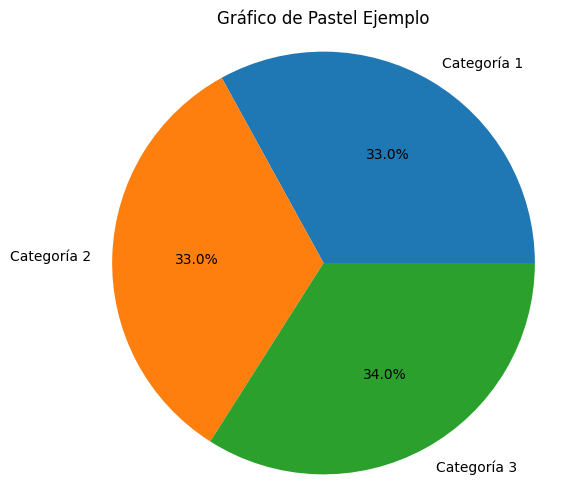

In [236]:
plt.figure(figsize=(6, 6))  # Opcional: ajusta el tamaño de la figura

plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=0)
# labels: Etiquetas para cada categoría.
# autopct: Formato de las etiquetas mostrando el porcentaje.
# startangle: Ángulo inicial de inicio del gráfico (opcional).

plt.axis('equal')  # Esto asegura que el gráfico de pastel sea un círculo.

plt.title('Gráfico de Pastel Ejemplo')